# CPSC 330 - Applied Machine Learning 

## Homework 5: Evaluation metrics
### Associated lectures: [Lectures 9, 10](https://ubc-cs.github.io/cpsc330/README.html) 

**Due date: Monday, Feb 28, 2022 at 11:59pm**

## Imports

In [1]:
import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    plot_confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    precision_recall_curve,
    average_precision_score,
    roc_curve,
    roc_auc_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Instructions 
<hr>
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Exercise 1: Precision, recall, and f1 score by hand <a name="1"></a>
<hr>

Consider the problem of predicting whether a patient has a disease or not. Below are confusion matrices of two machine learning models: Model A and Model B. 

- Model A

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 18 | 22 |
| **Actual no disease**       | 10 | 100 |


- Model B

|    Actual/Predicted      | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 23 | 17 |
| **Actual no disease**       | 20 | 90 |

### 1.1 Positive vs. negative class 
rubric={points:2}

**Your tasks:**

Precision, recall, and f1 score depend upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class? Why? 

Ans: The 'disease' class is likely to be the 'positive' class since we want to detect if patients have the disease. Also, there are far more patients without disease than with it in our dataset, and generally the smaller class is the positive one.

<br><br>

### 1.2 Accuracy
rubric={points:2}

**Your tasks:**

Calculate accuracies for Model A and Model B. 

We'll store all metrics associated with Model A and Model B in the `results_dict` below. 

In [2]:
results_dict = {"A": {}, "B": {}}

In [3]:
results_dict["A"]["accuracy"] = (18 + 100)/(18+22+10+100)
results_dict["B"]["accuracy"] = (23 + 90)/(23+17+20+90)

In [4]:
assert tests_hw5.ex1_2_1(
    results_dict["A"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [5]:
assert tests_hw5.ex1_2_2(
    results_dict["B"]["accuracy"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [6]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.786667,0.753333


<br><br>

### 1.3 Which model would you pick? 
rubric={points:1}

**Your tasks:**

Which model would you pick simply based on the accuracy metric? 

Ans: I would pick model A since it has a slightly higher accuracy metric (~0.78 compared to ~0.75 for model B).

<br><br>

### 1.4 Precision, recall, f1-score
rubric={points:6}

**Your tasks:**

1. Calculate precision, recall, f1-score for Model A and Model B manually, without using `scikit-learn` tools. 


In [7]:
results_dict["A"]["precision"] = 18/(18+10)
results_dict["B"]["precision"] = 23/(23+20)
results_dict["A"]["recall"] = 18/(18+22)
results_dict["B"]["recall"] = 23/(23+17)

A_prec = results_dict["A"]["precision"] 
B_prec = results_dict["B"]["precision"]
A_rec = results_dict["A"]["recall"]
B_rec = results_dict["B"]["recall"]

results_dict["A"]["f1"] = 2*(A_prec*A_rec)/(A_prec + A_rec)
results_dict["B"]["f1"] = 2*(B_prec*B_rec)/(B_prec + B_rec)

In [8]:
assert tests_hw5.ex1_4_1(
    results_dict["A"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [9]:
assert tests_hw5.ex1_4_2(
    results_dict["B"]["precision"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [10]:
assert tests_hw5.ex1_4_3(
    results_dict["A"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [11]:
assert tests_hw5.ex1_4_4(
    results_dict["B"]["recall"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [12]:
assert tests_hw5.ex1_4_5(
    results_dict["A"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


In [13]:
assert tests_hw5.ex1_4_6(
    results_dict["B"]["f1"]
), "Your answer is incorrect, see traceback above."
print("Success")

Success


Show the dataframe with all results. 

In [14]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.786667,0.753333
precision,0.642857,0.534884
recall,0.450000,0.575000
f1,0.529412,0.554217


<br><br>

### 1.5 Discussion
rubric={points:4}

**Your tasks:**
1. Which metric is more informative in this problem? Why? 
2. Which model would you pick based on this information? 

Ans:
1. Recall is more informative in this problem since we want to detect as many positive (i.e. has disease) cases as possible but being completely confident in the cases identified as positive is less important. Therefore recall is more important than precision here. The F1 score is also informative, but we care more about recall here and F1 combines recall & precision.
2. I would pick model B since it has a better recall and slightly better F1 score, even though its precision is worse.

<br><br>

### (Optional) 1.6 
rubric={points:1}

**Your tasks:**

Provide 2 to 3 example classification datasets (with links) where accuracy metric would be misleading. Discuss which evaluation metric would be more appropriate for each dataset. You may consider datasets we have used in this course so far. You could also look up datasets on Kaggle. 

Ans: Two example classification datasets where accuracy would me misleading are Kaggle's [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud) dataset and [SMS Spam Collection Dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset). They are both unbalanced datasets; the fraud detection dataset contains far more non-fraud than fraud examples, and the SMS spam dataset contains far more non-spam than spam examples. In either case a high accuracy score would be misleading since even a dummy classifier would be able to achieve high accuracy by always predicting the larger class. The recall metric is more relevant for the fraud detection dataset, since we want to 'catch' as many potential cases of credit card fraud as possible, and recall = TP / (TP + FN). The precision metric is more relevant for the SMS spam dataset, since we care about not falsely labelling non-spam messages as spam, and precision = TP / (TP + FP).

<br><br><br><br>

### Exercise 2: Classification evaluation metrics using `sklearn` <a name="2"></a>
<hr>

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In class, we looked at credit card fraud dataset which is a classic example of an imbalanced dataset. 

Another example is customer churn datasets. [Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Once you have the data, you should be able to run the following code:

The starter code below reads the data CSV as a pandas dataframe and splits it into 70% train and 30% test. 

Note that `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.

> Note that for this kind of problem a more appropriate technique is something called survival analysis and we'll be talking about it later in the course. For now, we'll just treat it as a binary classification problem. 

In [15]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,False
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,False
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,False
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WY,126,408,339-9798,yes,no,0,197.6,126,33.59,...,112,20.95,285.3,104,12.84,12.5,8,3.38,2,False
3089,WV,70,510,348-3777,no,yes,30,143.4,72,24.38,...,92,14.45,127.9,68,5.76,9.4,4,2.54,3,False
1766,NJ,125,415,406-6400,no,no,0,182.3,64,30.99,...,121,11.88,171.6,96,7.72,11.6,7,3.13,2,False
1122,NE,159,415,362-5111,no,no,0,189.1,105,32.15,...,147,20.92,242.0,106,10.89,10.4,5,2.81,1,True


<br><br>

### 2.1 Distribution of target values
rubric={points:4}

**Your tasks:**

Examine the distribution of target values in the train split. Do you see class imbalance? If yes, do we need to deal with it? Why or why not? 

In [16]:
churnFalse = train_df[train_df["churn"] == False]
churnTrue = train_df[train_df["churn"] == True]
print(f"# Target=False: {len(churnFalse)}, # Target=True: {len(churnTrue)}")

# Target=False: 1984, # Target=True: 349


Ans: Yes, there is class imbalance of target values in the train split (there are far more 'False' than 'True' values). Yes, we need to deal with it because otherwise it will affect the performance of the model by biasing it towards the False class, resulting in a high accuracy that is essentially meaningless.

<br><br>

### (Optional) 2.2 EDA 
rubric={points:1}

**Your tasks:**

Come up with **two** exploratory questions you would like to answer and explore those. Briefly discuss your results in 1-3 sentences.

You are welcome to use `pandas_profiling` (see Lecture 10) but you don't have to.

#### TODO if I get around to it. Optional

<br><br>

### 2.3 Column transformer 
rubric={points:10}

The code below creates `X_train`, `y_train`, `X_test`, `y_test` for you. 
In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

In each case, briefly explain your rationale with 1-2 sentences. You do not need an explanation for every feature, but for every group of features that are being transformed the same way. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

In [17]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

In [18]:
#X_train.info()
#train_df.head()
#X_train.nunique()

In [19]:
# TODO - ordinal encoder is imported but I don't use it. check.
drop_features = ["phone number"]
binary_features = ["international plan", "voice mail plan"]
categorical_features = ["state", "area code"]
numeric_features = [
    "account length",
    "number vmail messages",
    "total day minutes",
    "total day calls",
    "total day charge",
    "total eve minutes",
    "total eve calls",
    "total eve charge",
    "total night minutes",
    "total night calls",
    "total night charge",
    "total intl minutes",
    "total intl calls",
    "total intl charge",
    "customer service calls"
]

preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(drop="if_binary", dtype=int), binary_features),
    (OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_features),
    ("drop", drop_features),
)

Explanations:
- I drop "phone number" since it's not informative and definitely not generalizable.
- I apply one-hot encoding (OHE) with argument `drop="if_binary"` to "international plan", "voice mail plan" since they are binary categorical features (the only possible values are 'yes' and 'no').
- I apply OHE to "state", "area code" since they are categorical features but not binary
- I apply scaling to the rest of the features (listed above) since they are numerical and have very different ranges that need to be scaled

<br><br>

### 2.4 Visualizing the transformed data 
rubric={points:4}

Fit and transform your `ColumnTransformer` on your training set. Print the first 5 rows of the transformed data as a dataframe (not numpy array). See lecture 10 for code that can get you the new column names after transforming. 

In [20]:
preprocessor.fit(X_train, y_train)
print(preprocessor.named_transformers_)

{'standardscaler': StandardScaler(), 'onehotencoder-1': OneHotEncoder(drop='if_binary', dtype=<class 'int'>), 'onehotencoder-2': OneHotEncoder(handle_unknown='ignore', sparse=False), 'drop': 'drop'}


In [21]:
# Adapted from lec10 code
# column names
ohe_binary = list(
    preprocessor.named_transformers_["onehotencoder-1"]
    .get_feature_names_out(binary_features)
)
ohe_columns = list(
    preprocessor.named_transformers_["onehotencoder-2"]
    .get_feature_names_out(categorical_features)
)
new_columns = numeric_features + ohe_binary + ohe_columns

# display as df
X_train_trans = pd.DataFrame(
    preprocessor.transform(X_train), index=X_train.index, columns=new_columns
)
X_train_trans.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510
1402,-0.767893,-0.587624,0.618769,-0.721211,0.618927,0.069871,-1.156734,0.069926,1.088667,0.052115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1855,-0.843585,-0.587624,-1.293778,1.655252,-1.293517,-1.167277,-1.207278,-1.166291,-2.162302,-0.720990,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
633,0.544113,1.900976,-0.609809,0.169963,-0.609654,-2.210130,0.157417,-2.211244,0.369287,-0.463288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1483,0.165650,-0.587624,0.998345,-0.473663,0.998611,-0.754894,0.258506,-0.755774,1.597736,0.000574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2638,0.115188,-0.587624,-0.994886,0.764078,-0.994731,1.195994,-0.246937,1.196515,0.793839,0.206736,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<br><br>

### 2.5 area code feature
rubric={points:4}

The original dataset had a feature called `area code`. Let's assume we encoded this feature with one-hot encoding.

1. The area codes were numbers to begin with. Why do we want to use one-hot encoding on this feature?
2. What were the possible values of `area code`? 
3. What new feature(s) were created to replace `area code`? 

Ans:
1. We use one-hot encoding because area codes are categories; they are not continuous values and also don't have ordinality.
2. The possible `area code` values in the training set were 408, 415, and 510. However, without access to dataset metadata, we can't be sure that these are all the possible area code values in test / deployment data.
3. The new features created to replace `area code` were `area code_408`, `area code_415`, and `area code_510`.

<br><br>

### 2.6 Dummy classifier
rubric={points:4}

**Your tasks:**

Create a `DummyClassifier`. Report the following scoring metrics via cross-validation: accuracy, precision, recall, f1-score. Briefly comment on your results, including any warnings the code produces (2 sentences max).

In [22]:
dummy = DummyClassifier(strategy="prior")
dummy_pipe = make_pipeline(preprocessor, dummy)

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

res = cross_validate(dummy_pipe, X_train, y_train, cv=5, scoring=scoring)
pd.DataFrame(res)

C:\Users\alice\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alice\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alice\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alice\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_cl

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1_score
0,0.020944,0.015955,0.850107,0.0,0.0,0.0
1,0.014962,0.011966,0.850107,0.0,0.0,0.0
2,0.013964,0.009971,0.850107,0.0,0.0,0.0
3,0.016953,0.010971,0.851931,0.0,0.0,0.0
4,0.012966,0.009973,0.849785,0.0,0.0,0.0


In [23]:
print(f"Mean 5-fold accuracy score = {np.mean(res.get('test_accuracy')):.3f}")

Mean 5-fold accuracy score = 0.850


Ans: The dummy classifier generated a warning because it only ever predicts the no churn (churn = False) target class since it's the most frequent class. It never predicts the positive class (churn = True), so the precision and recall scores are always 0, which is exactly what the error states. Accuracy score is fairly high but is uninformative due to the class imbalance.

<br><br>

### 2.7 Logistic regression
rubric={points:8} 

**Your tasks:**

1. Train and score a logistic regression classifier on the dataset. 
2. Report the same metrics as in the previous part.
3. Are you satisfied with the results? Use your `DummyClassifier` results as a reference point. Discuss in a few sentences. 

In [24]:
logreg_pipe = make_pipeline(preprocessor, LogisticRegression())
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

res = cross_validate(logreg_pipe, X_train, y_train, cv=5, scoring=scoring)
pd.DataFrame(res)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1_score
0,0.069510,0.009972,0.869379,0.666667,0.257143,0.371134
1,0.050865,0.009973,0.852248,0.520000,0.185714,0.273684
2,0.048870,0.014959,0.850107,0.500000,0.171429,0.255319
3,0.045878,0.009974,0.869099,0.642857,0.260870,0.371134
4,0.041892,0.013958,0.839056,0.413793,0.171429,0.242424


In [25]:
print(f"Mean 5-fold accuracy score = {np.mean(res.get('test_accuracy')):.3f}")
print(f"Mean 5-fold precision score = {np.mean(res.get('test_precision')):.3f}")
print(f"Mean 5-fold recall score = {np.mean(res.get('test_recall')):.3f}")
print(f"Mean 5-fold f1 score = {np.mean(res.get('test_f1_score')):.3f}")

Mean 5-fold accuracy score = 0.856
Mean 5-fold precision score = 0.549
Mean 5-fold recall score = 0.209
Mean 5-fold f1 score = 0.303


Ans: I am not satisfied with the results because the accuracy is only a little better than the dummy classifier (even though it looks high on its own), and is also uninformative due to the class imbalance. In addition, the precision, recall, and f1 score are all quite low, indicating the model isn't performing as well as the high accuracy score suggests, likely also due to the class imbalance.

<br><br>

### 2.8 Logistic regression with `class_weight`
rubric={points:6}

**Your tasks:**

1. Set the `class_weight` parameter of your logistic regression model to `'balanced'` and report the same metrics as in the previous part. 
2. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences.

In [26]:
logreg_pipe = make_pipeline(preprocessor, LogisticRegression(class_weight="balanced"))
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

res = cross_validate(logreg_pipe, X_train, y_train, cv=5, scoring=scoring)
pd.DataFrame(res)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1_score
0,0.099734,0.025928,0.785867,0.380952,0.685714,0.489796
1,0.086771,0.017949,0.768737,0.366197,0.742857,0.490566
2,0.105718,0.019945,0.764454,0.348485,0.657143,0.455446
3,0.078788,0.012965,0.751073,0.340136,0.724638,0.462963
4,0.088762,0.024934,0.733906,0.320000,0.685714,0.436364


In [27]:
print(f"Mean 5-fold accuracy score = {np.mean(res.get('test_accuracy')):.3f}")
print(f"Mean 5-fold precision score = {np.mean(res.get('test_precision')):.3f}")
print(f"Mean 5-fold recall score = {np.mean(res.get('test_recall')):.3f}")
print(f"Mean 5-fold f1 score = {np.mean(res.get('test_f1_score')):.3f}")

Mean 5-fold accuracy score = 0.761
Mean 5-fold precision score = 0.351
Mean 5-fold recall score = 0.699
Mean 5-fold f1 score = 0.467


Ans: The model has worse accuracy and precision but better recall and f1 scores. I do prefer this model to the one in the previous part because in churn detection I think recall is more important than precision - it's more important to detect when churn happens even if that means falsely classifying instances as churn sometimes, since that is the case subscription services want to find and prevent. Also, even when considering precision and recall together, the f1 score for this model is ~0.1 higher.

<br><br>

### 2.9 Hyperparameter optimization
rubric={points:10}

Now let's tune the hyperparameters of our `LogisticRegression` using `GridSearchCV` to maximize cross-validation f1 score. 

**Your tasks:**

1. Jointly optimize `C` (choose some reasonable values) and `class_weight` (`None` vs. `'balanced'`) with `GridSearchCV` and `scoring="f1"`. 
2. What values of `C` and `class_weight` are chosen and what is the best cross-validation f1 score?

In [28]:
# Adapted from lec8
pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))

C_vals = 10.0 ** np.arange(-2, 2, 0.5)
class_weight = [None, 'balanced']

param_grid = {
    "logisticregression__C": C_vals,
    "logisticregression__class_weight": class_weight
}

grid_search = GridSearchCV(
    pipe, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring='f1'
)
# I only assigned it to var 'fit' to stop output from being displayed
fit = grid_search.fit(X_train, y_train)

In [29]:
results = pd.DataFrame(grid_search.cv_results_)[
    [
        "mean_test_score",
        "param_logisticregression__C",
        "param_logisticregression__class_weight",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().head().T

display(results)
print("(scores past rank = 5 are not displayed here)")

rank_test_score,1,2,3,4,5
mean_test_score,0.478736,0.472524,0.470403,0.467027,0.461813
param_logisticregression__C,0.1,0.031623,0.316228,1.0,3.162278
param_logisticregression__class_weight,balanced,balanced,balanced,balanced,balanced
mean_fit_time,0.08996,0.104322,0.137632,0.161167,0.194281


(scores past rank = 5 are not displayed here)


Ans: The values `C` = 0.1 and `class_weight` = balanced are chosen for achieving the best cross-validation score of 0.478.

<br><br>

### 2.10 Test results
rubric={points:10}

**Your tasks**
1. Evaluate the best model on the test set. In particular show each of the following on the test set:  
    - Confusion matrix. 
    - Classification report. 
    - Precision-recall curve with average precision score.     
    - ROC curve with AUC. 
3. Comment on the results.    

> Note that we are not doing it here but in real life, you would also plot confusion matrix, precision-recall curve, and ROC curve on validation data to examine errors and to choose a threshold which works for your operating point. 

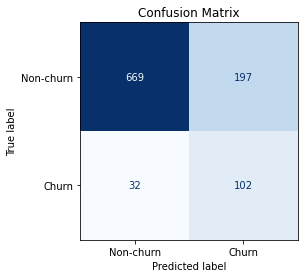

Classification Report:
              precision    recall  f1-score   support

   Non-churn       0.95      0.77      0.85       866
       Churn       0.34      0.76      0.47       134

    accuracy                           0.77      1000
   macro avg       0.65      0.77      0.66      1000
weighted avg       0.87      0.77      0.80      1000



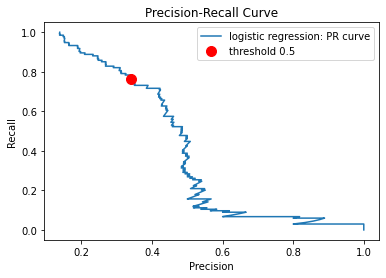

Average precision(AP) score: 0.45628


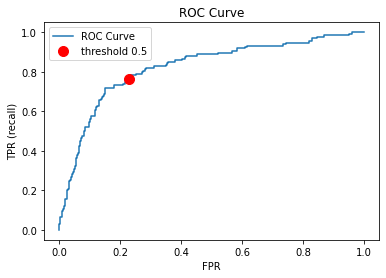

AUC score: 0.82267


In [30]:
# Adapted from lec9
score = grid_search.score(X_test, y_test)
pred = grid_search.predict(X_test)

# confusion matrix
confusion_plot = ConfusionMatrixDisplay.from_estimator(
    grid_search,
    X_test,
    y_test,
    display_labels=["Non-churn", "Churn"],
    values_format="d",
    cmap=plt.cm.Blues,
    colorbar=False,
);
plt.title("Confusion Matrix")
plt.show()
# classification report
print("Classification Report:")
print(
    classification_report(
        y_test, pred, target_names=["Non-churn", "Churn"]
    )
)
# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(
    y_test, grid_search.predict_proba(X_test)[:, 1]
)
plt.plot(precision, recall, label="logistic regression: PR curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.plot(
    precision_score(y_test, pred),
    recall_score(y_test, pred),
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");
plt.title("Precision-Recall Curve")
plt.show()

# AP score
ap = average_precision_score(y_test, grid_search.predict_proba(X_test)[:, 1])
print("Average precision(AP) score: {:.5f}".format(ap))

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
default_threshold = np.argmin(np.abs(thresholds - 0.5))
plt.plot(
    fpr[default_threshold],
    tpr[default_threshold],
    "or",
    markersize=10,
    label="threshold 0.5",
)
plt.legend(loc="best");
plt.title("ROC Curve")
plt.show()

# AUC score
auc = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
print("AUC score: {:.5f}".format(auc))


Ans: The precision is low (as we've already seen in previous parts, when considering 'churn' as the positive class), and from the PR curve and low AP score we can see that average precision is low for this model across all thresholds. The f1 score, also affected by the low precision, is somewhat low (~ 0.47). However, recall is high and the AUC score is relatively high (~ 0.82), indicating that the average ratio of TPR to FPR is high for the model.


<br><br><br><br>

### Exercise 3: Regression metrics <a name="3"></a>
<hr> 


For this exercise, we'll use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from `sklearn datasets`. The code below loads the dataset.  

In [31]:
from sklearn.datasets import fetch_california_housing

housing_df = fetch_california_housing(as_frame=True).frame

### 3.1: Data spitting and exploration 
rubric={points:4}

**Your tasks:**

1. Split the data into train (80%) and test (20%) splits. 
2. Explore the train split. Do you need to apply any transformations on the data? If yes, create a preprocessor with the appropriate transformations. 
3. Separate `X` and `y` in train and test splits. 

In [32]:
train_df, test_df = train_test_split(housing_df, test_size=0.3, random_state=123)
X_train, y_train = train_df.drop(columns=["MedHouseVal"]), train_df["MedHouseVal"]
X_test, y_test = test_df.drop(columns=["MedHouseVal"]), test_df["MedHouseVal"]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14448 entries, 12364 to 19966
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      14448 non-null  float64
 1   HouseAge    14448 non-null  float64
 2   AveRooms    14448 non-null  float64
 3   AveBedrms   14448 non-null  float64
 4   Population  14448 non-null  float64
 5   AveOccup    14448 non-null  float64
 6   Latitude    14448 non-null  float64
 7   Longitude   14448 non-null  float64
dtypes: float64(8)
memory usage: 1015.9 KB


In [33]:
numeric_features = [
    "MedInc",
    "HouseAge",
    "AveRooms",
    "AveBedrms",
    "Population",
    "AveOccup",
    "Latitude",
    "Longitude"
]
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features)
)

<br><br>

### 3.2 Baseline: DummyRegressor 
rubric={points:2}

**Your tasks:**
1. Carry out cross-validation using `DummyRegressor` with default scoring. 
2. What metric is used for scoring by default? 

In [34]:
dummy_pipe = make_pipeline(preprocessor, DummyRegressor(strategy="mean"))
cv_res = cross_validate(dummy_pipe, X_train, y_train, cv=5)
pd.DataFrame(cv_res)

,fit_time,score_time,test_score
0,0.021947,0.005976,-0.001119
1,0.019948,0.004987,-0.000139
2,0.007981,0.005983,-0.000627
3,0.007980,0.004987,-0.000413
4,0.007982,0.002989,-0.000002


In [35]:
print(f"Mean 5-fold accuracy score = {np.mean(cv_res.get('test_score')):.5f}")

Mean 5-fold accuracy score = -0.00046


Ans: The metric used for scoring by default is the R^2 score.

<br><br>

### 3.3 Different regressors
rubric={points:8}

In this exercise, we are going to use [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model which we haven't looked into yet. At this point you should feel comfortable using models with our usual ML workflow even if you don't know the details. We'll talk about `RandomForestRegressor` later in the course.  

The code below defines a custom scorer called `mape_scorer` and creates dictionaries for different regressors (`models`) and different scoring metrics (`score_types_reg`). 

**Your tasks:**

1. Using the `models` and the evaluation metrics `score_types_reg` in the code below, carry out cross-validation with each model, by passing the evaluation metrics to `scoring` argument of `cross_validate`. Use a pipeline with the model as an estimator if you are applying any transformations. 
2. Show results as a dataframe. 
3. Interpret the results. How do the models compare to the baseline? Which model seems to be performing well with different metrics? 


In [36]:
def mape(true, pred):
    return 100.0 * np.mean(np.abs((pred - true) / true))


# make a scorer function that we can pass into cross-validation
mape_scorer = make_scorer(mape, greater_is_better=False)

models = {
    # FYI - I added this dummy for comparison
    "Dummy": DummyRegressor(strategy="mean"),
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
}

score_types_reg = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "neg_root_mean_squared_error": "neg_root_mean_squared_error",
    "neg_mean_absolute_error": "neg_mean_absolute_error",
    "r2": "r2",
    "mape_scorer": mape_scorer,
}

In [37]:
# From code given for Hw3
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [38]:
results_dict = {}

for modelName, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    results_dict[modelName] = mean_std_cross_val_scores(
        pipe, X_train, y_train, cv=5, scoring=score_types_reg
    )

In [39]:
pd.DataFrame(results_dict)

,Dummy,Ridge,Random Forest
fit_time,0.015 (+/- 0.006),0.013 (+/- 0.001),8.509 (+/- 0.428)
score_time,0.008 (+/- 0.003),0.007 (+/- 0.003),0.104 (+/- 0.014)
test_neg_mean_squared_error,-1.336 (+/- 0.047),-0.668 (+/- 0.298),-0.272 (+/- 0.009)
test_neg_root_mean_squared_error,-1.156 (+/- 0.020),-0.804 (+/- 0.163),-0.521 (+/- 0.009)
test_neg_mean_absolute_error,-0.913 (+/- 0.015),-0.536 (+/- 0.010),-0.342 (+/- 0.003)
test_r2,-0.000 (+/- 0.000),0.496 (+/- 0.239),0.796 (+/- 0.009)
test_mape_scorer,-61.934 (+/- 1.015),-31.906 (+/- 0.752),-19.327 (+/- 0.460)


Ans: 
These models perform better than the baseline based on every metric used (smaller magnitude of MSE, RMSE, MAE, MAPE and larger R^2). The Random Forest performs better than Ridge with every metric used, and also seems more consistent (the std is lower for all scores).

<br><br>

### (Optional) 3.4 Hyperparameter optimization 
rubric={points:1}

**Your tasks:**
1. Carry out hyperparameter optimization using `RandomizedSearchCV` and `Ridge` with the following `param_dist`. The `alpha` hyperparameter of `Ridge` controls the fundamental tradeoff. Choose the metric of your choice for hyperparameter optimization. 
2. Are you getting better scores compared to the default values?

In [40]:
from scipy.stats import loguniform

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}

In [41]:
pipe_ridge = make_pipeline(preprocessor, Ridge())
random_search = RandomizedSearchCV(
    pipe_ridge,
    param_distributions=param_dist,
    n_jobs=-1,
    n_iter=10,
    cv=5,
    random_state=123,
    scoring="r2"
)
random_search.fit(X_train, y_train);

In [42]:
pd.DataFrame(random_search.cv_results_)[
    [
        "mean_test_score",
        "param_ridge__alpha",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().head().T

rank_test_score,1,2,3,4,5
mean_test_score,0.496004,0.496003,0.495998,0.495995,0.495985
param_ridge__alpha,0.022967,0.0521,0.225271,0.345652,0.768407
mean_fit_time,0.020546,0.022342,0.017161,0.01875,0.018552


Ans:
The best R^2 score I'm getting is ~ 0.496, which is not noticeably better than the best score using the default alpha = 1.0. However, the 'optimal' alpha value found here using randomized search is much lower than the default, which would increase model complexity, so I would still stick with the default alpha if using the Ridge() model in this instance.

<br><br>

### 3.5 Test results
rubric={points:4}

**Your tasks:**

1. Try the best model on the test set.
2. Briefly comment on the results. (1 to 2 sentences) 

In [43]:
pipe_forest = make_pipeline(preprocessor, RandomForestRegressor())
pipe_forest.fit(X_train, y_train)
score = pipe_forest.score(X_test, y_test)
print(f"Score on test set: {score}")

Score on test set: 0.8102594593289122


Ans: The score on the test set (~ 0.81) is a little higher than the mean CV score (from 3.3), which indicates our model could be underfit. 

<br><br>

### 3.6 Model interpretation  
rubric={points:4}

Ridge is a linear model and it learns coefficients associated with each feature during `fit()`. 

**Your tasks:**

1. Visualize coefficients learned by the `Ridge` model above as a pandas dataframe with two columns: features and coefficients. If you attempted 3.4, use the `Ridge` model with best hyperparameters. Otherwise use the `Ridge` model with default hyperparameters. 
2. Increasing which feature values would result in higher housing price? 

In [44]:
pipe_ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
pipe_ridge.fit(X_train, y_train)
coeffs = pipe_ridge.named_steps["ridge"].coef_
pd.DataFrame(data=coeffs, index=X_train.columns, columns=["Coefficients"])

,Coefficients
MedInc,0.829610
HouseAge,0.115305
AveRooms,-0.269777
AveBedrms,0.309432
Population,-0.003684
AveOccup,-0.042136
Latitude,-0.899810
Longitude,-0.869725


Ans: Increasing MedInc (median income), HouseAge (house age), or AveBedrms (average # of bedrooms per household) would result in a higher housing price.

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 